In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')


In [4]:
df = pd.read_csv("C:\\Users\\Sneha Majumder\\Downloads\\breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#DATA PREPROCESSING
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

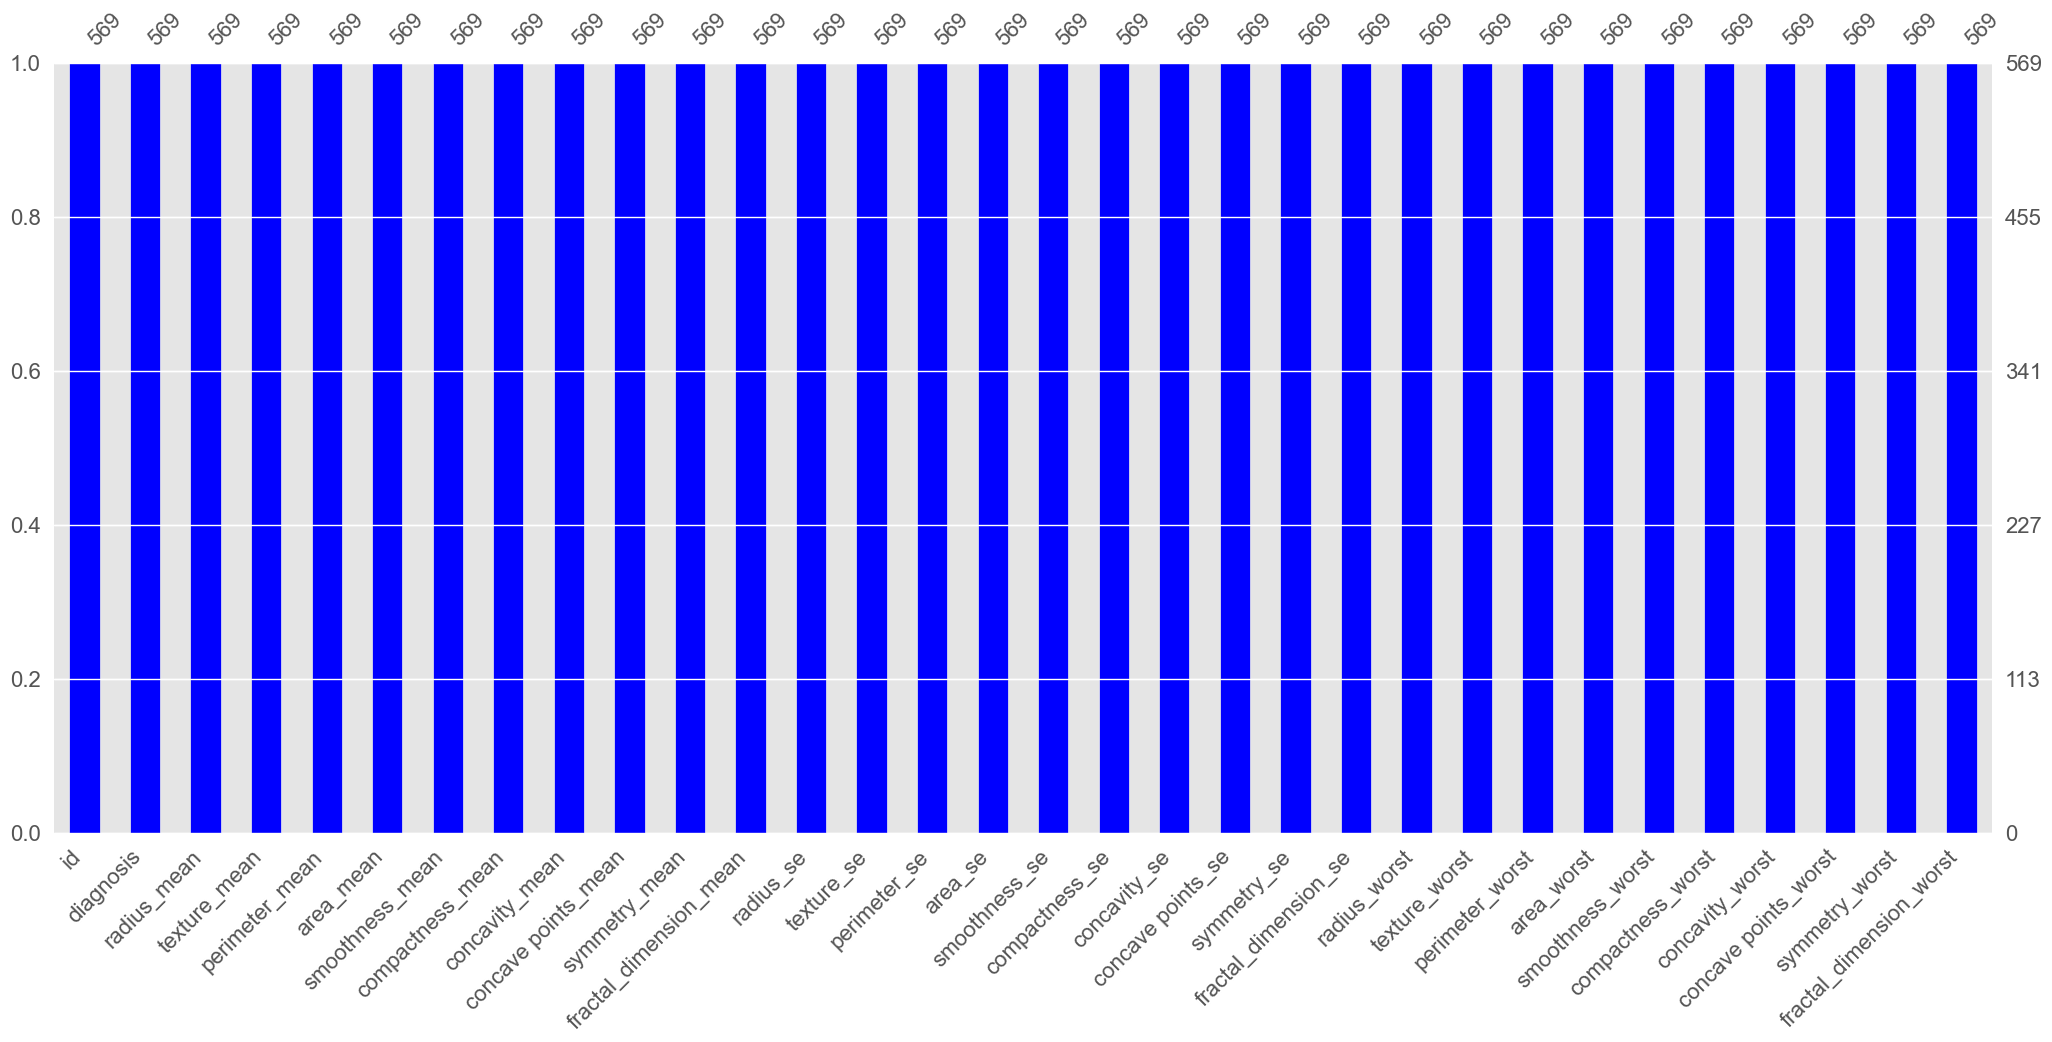

In [9]:
msno.bar(df, color='blue')

In [10]:
df['diagnosis']= df['diagnosis'].apply (lambda val:1 if val=='M' else 0)

(array([357.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 212.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

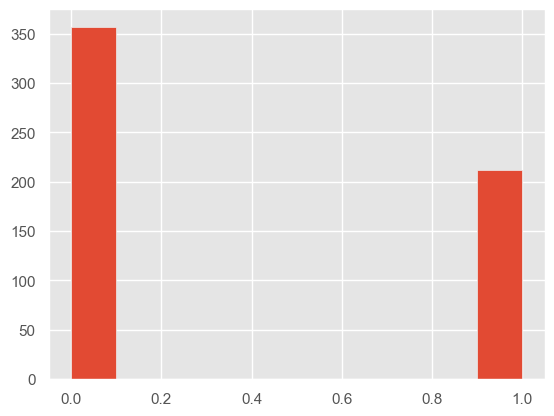

In [11]:
plt.hist(df['diagnosis'])

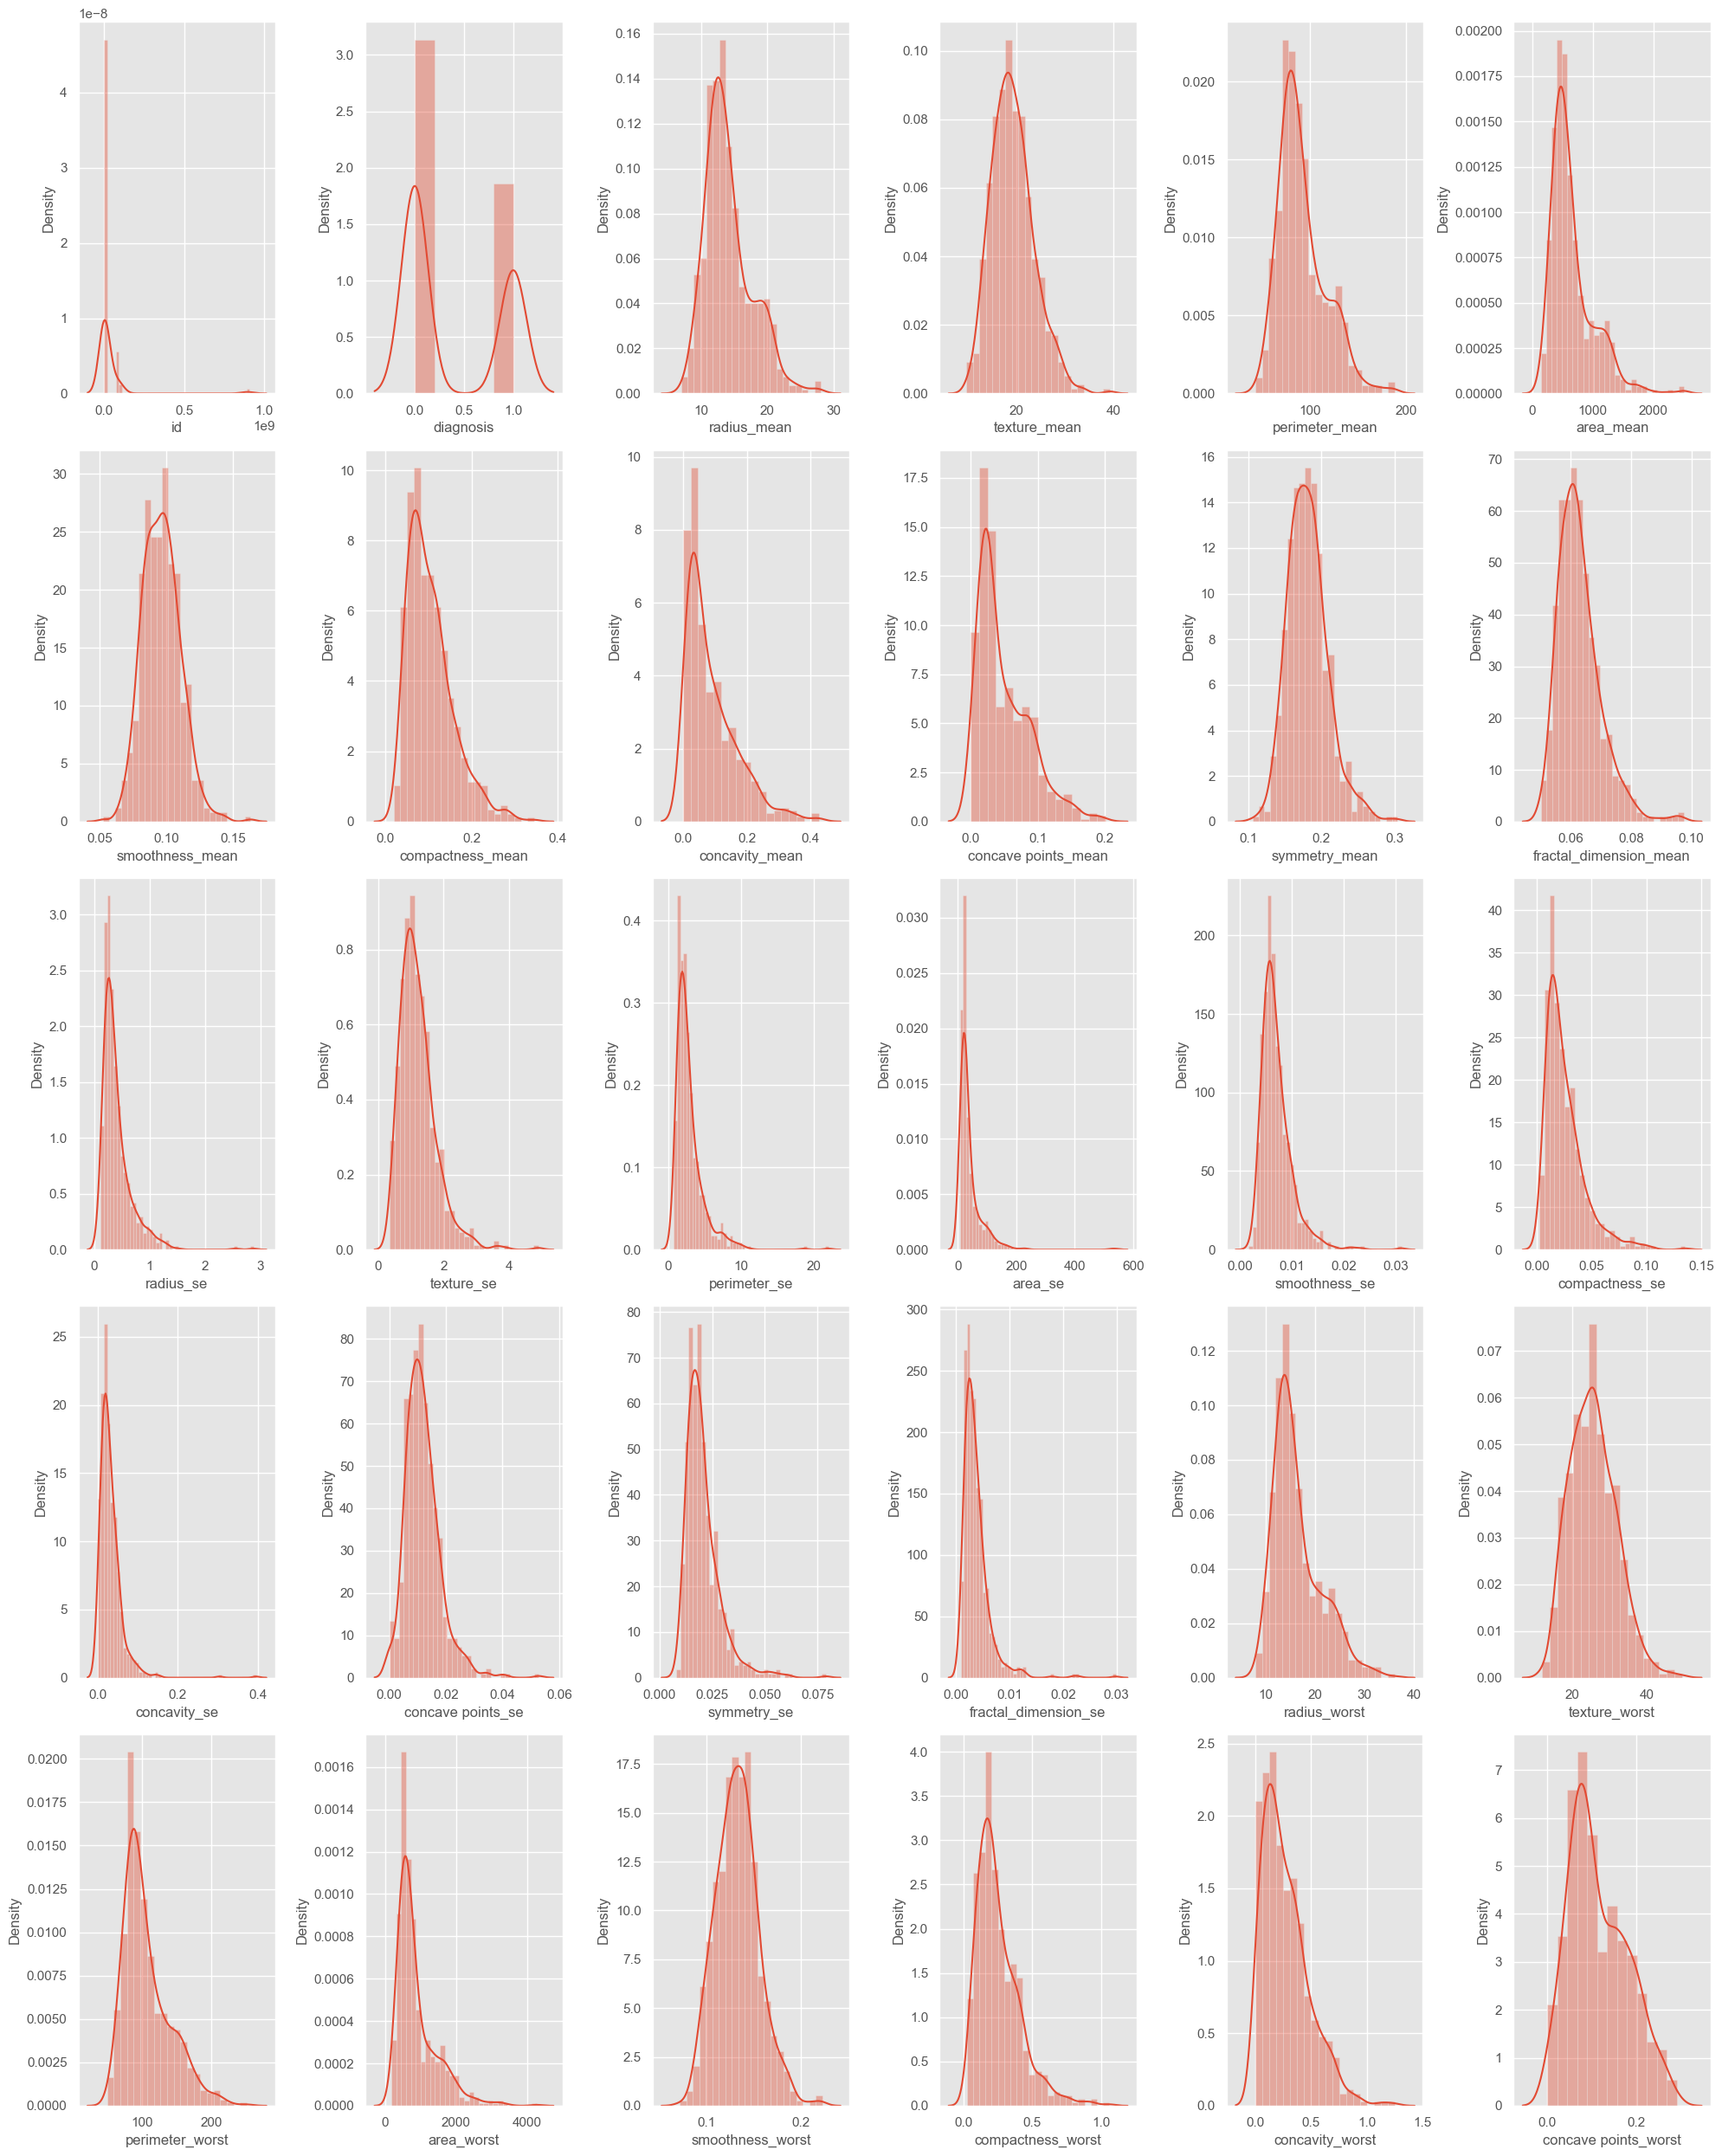

In [12]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<= 30:
        plt.subplot(5,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        plotnumber+=1
plt.tight_layout()
plt.show()

In [13]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


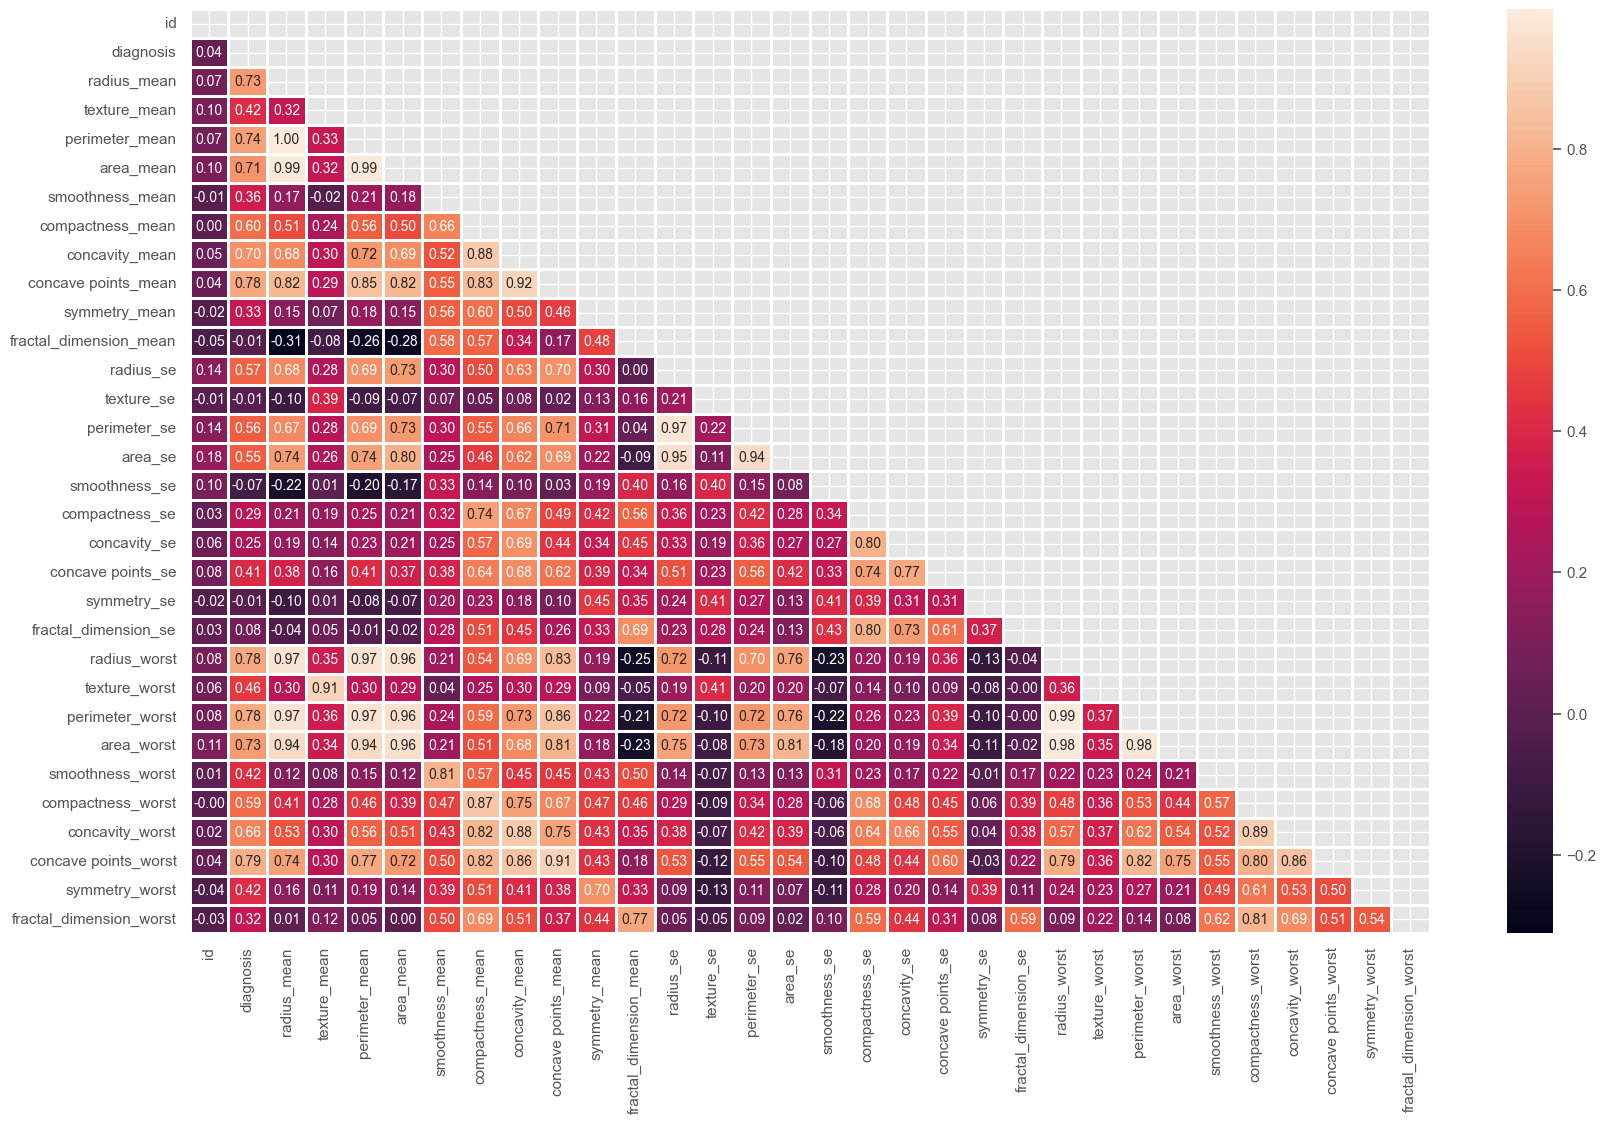

In [14]:
plt.figure(figsize=(20,12))
corr = df.corr()

mask = np.triu(np.ones_like( corr, dtype= bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt =".2f")
plt.show()

In [15]:
df.drop('id', axis=1, inplace=True)

In [16]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop =[x for x in tri_df.columns if any(tri_df[x]>0.92)]
df = df.drop(to_drop, axis =1)
print (df.shape[1])

23


In [17]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [18]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(455, 22)

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train) 

LogisticRegression()

Training Accuracy: 0.873
Test Accuracy: 0.880


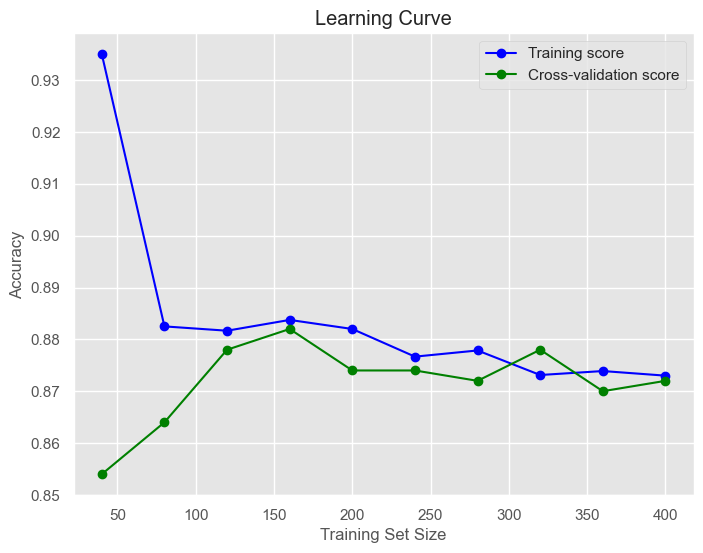

In [24]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score

def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, shuffle=True, random_state=42)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()



def main():
    
    X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                               n_informative=2, n_clusters_per_class=1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and train logistic regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    # Evaluate accuracy
    train_acc = accuracy_score(y_train, log_reg.predict(X_train))
    test_acc = accuracy_score(y_test, log_reg.predict(X_test))
    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy: {test_acc:.3f}")

    # Plot learning curve
    plot_learning_curve(LogisticRegression(), X, y, cv=5)

    
if __name__ == "__main__":
    main()



In [25]:
Y_pred = log_reg.predict(X_test)

In [26]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print (accuracy_score(Y_train, log_reg.predict(X_train)))
log_reg_acc=accuracy_score(Y_test, log_reg.predict(X_test))
print(log_reg_acc)
Y_pred = log_reg.predict(X_test)
print (confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

0.989010989010989
0.9649122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Training Accuracy: 0.970
Test Accuracy: 0.970


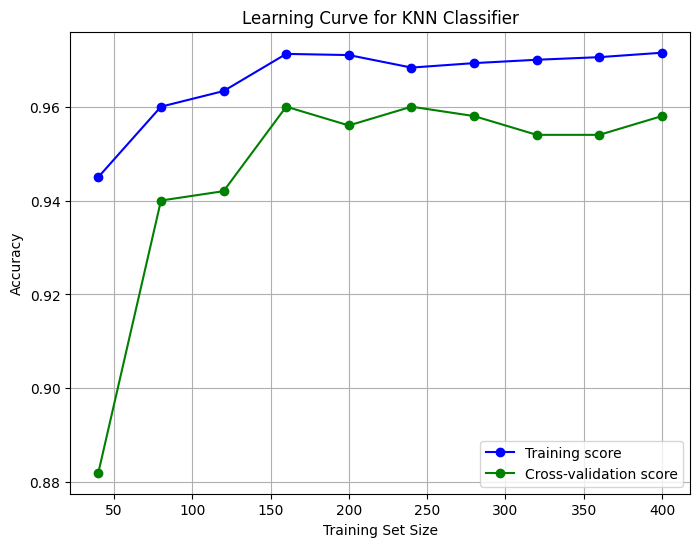

In [4]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score

def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, shuffle=True, random_state=42)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Cross-validation score')
    plt.title('Learning Curve for KNN Classifier')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


def main():
    # Generate synthetic 2D classification dataset
    X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                               n_informative=2, n_clusters_per_class=1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and train KNN classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    # Evaluate accuracy
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy: {test_acc:.3f}")

    # Plot learning curve
    plot_learning_curve(KNeighborsClassifier(), X, y, cv=5)

    
if __name__ == "__main__":
    main()


In [ ]:
Y_pred = knn.predict(X_test)

In [ ]:
Y_pred

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print (accuracy_score(Y_train, knn.predict(X_train)))
knn_acc = accuracy_score(Y_test, knn.predict(X_test))
print(knn_acc)
Y_pred = knn.predict(X_test)
print (confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc= SVC(probability=True)

parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, Y_train)



GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

Best parameters found: {'C': 20, 'gamma': 0.1}
Training Accuracy: 0.930
Test Accuracy: 0.930


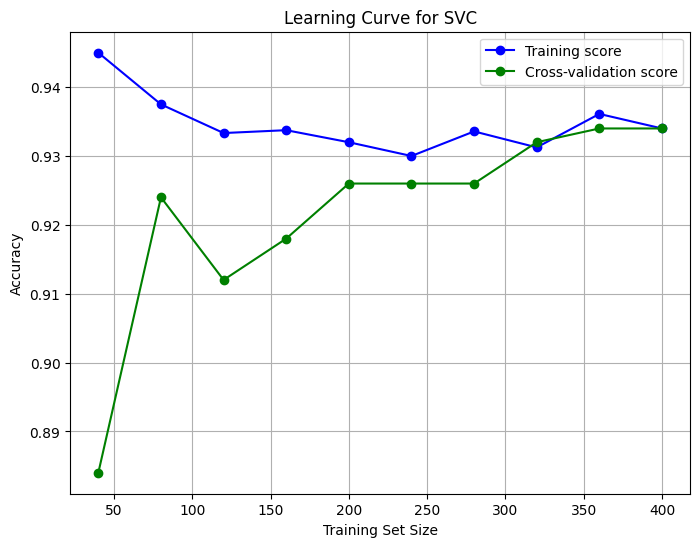

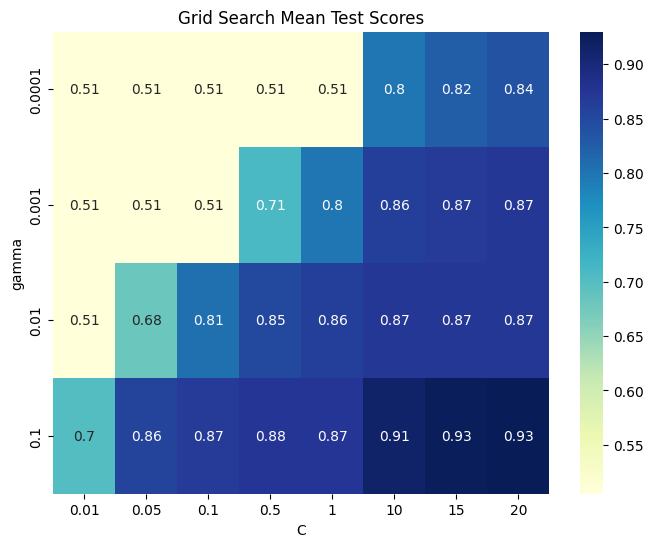

In [8]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score

def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, shuffle=True, random_state=42)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Cross-validation score')
    plt.title('Learning Curve for SVC')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


def plot_grid_search_results(grid_search, param1, param2):
    # Extract grid search results into matrix for heatmap plot
    scores_mean = grid_search.cv_results_['mean_test_score']
    params = grid_search.cv_results_['params']
    
    param1_vals = sorted(list(set([p[param1] for p in params])))
    param2_vals = sorted(list(set([p[param2] for p in params])))
    
    score_matrix = np.zeros((len(param2_vals), len(param1_vals)))
    
    for i, val2 in enumerate(param2_vals):
        for j, val1 in enumerate(param1_vals):
            for idx, p in enumerate(params):
                if p[param1] == val1 and p[param2] == val2:
                    score_matrix[i, j] = scores_mean[idx]
    
    plt.figure(figsize=(8,6))
    sns.heatmap(score_matrix, annot=True, xticklabels=param1_vals, yticklabels=param2_vals, cmap='YlGnBu')
    plt.xlabel(param1)
    plt.ylabel(param2)
    plt.title('Grid Search Mean Test Scores')
    plt.show()

def main():
    # Generate synthetic 2D dataset
    X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                               n_informative=2, n_clusters_per_class=1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    svc = SVC(probability=True)
    parameters = {
        'gamma': [0.0001, 0.001, 0.01, 0.1],
        'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
    }
    grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_model.predict(X_test))
    print(f"Best parameters found: {grid_search.best_params_}")
    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy: {test_acc:.3f}")

    # Plot learning curve with best estimator
    plot_learning_curve(best_model, X, y, cv=5)

    

    # Plot GridSearchCV results
    import seaborn as sns
    plot_grid_search_results(grid_search, param1='C', param2='gamma')

if __name__ == '__main__':
    main()


In [35]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [36]:
grid_search.best_score_

np.float64(0.9802197802197803)

In [37]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, Y_train)

SVC(C=15, gamma=0.01, probability=True)

In [38]:
Y_pred = svc.predict(X_test)

In [39]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print (accuracy_score(Y_train, svc.predict(X_train)))
svc_acc = accuracy_score(Y_test, svc.predict(X_test))
print(svc_acc)
Y_pred = svc.predict(X_test)
print (confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

0.989010989010989
0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [41]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'SVM', ],
    'Score' : [100*(log_reg_acc), 100*(knn_acc), 100*(svc_acc),]
})
models.sort_values(by = 'Score', ascending = False)
                    

,Model,Score
2,SVM,98.245614
0,Logistic Regression,96.491228
1,KNN,95.614035


In [42]:
import pickle
model = svc
pickle.dump(model, open("C:\\Users\\Sneha Majumder\\Downloads\\brest_cancer.pkl" , "wb"))

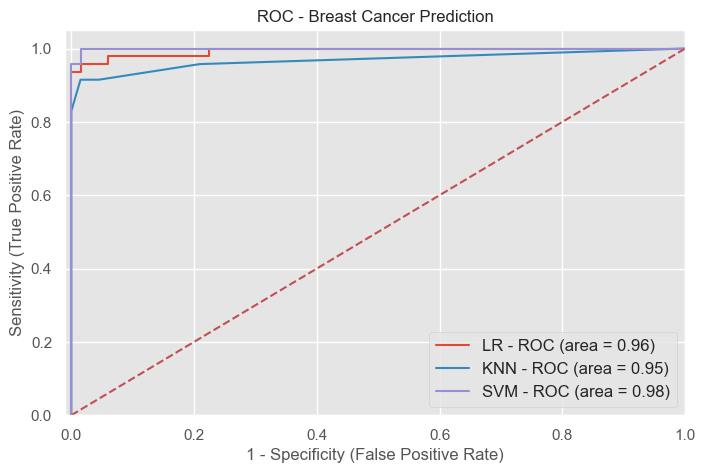

In [43]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models =[
    {
        'Label': 'LR',
        'Model': log_reg,
    },
    {
        'Label': 'KNN',
        'Model': knn,
},
{
        'Label': 'SVM',
        'Model': svc,
}
]
for m in models:
    model = m['Model'] 
    model.fit(X_train, Y_train) 
    Y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['Label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("C:\\Users\\Sneha Majumder\\Downloads\\roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

    
    

In [46]:

sample_input = [[ 0.11840, 0.27760, 0.14710, 0.2419,
                 0.07871, 0.9053, 153.40, 0.006399, 0.03003,
                 0.006193, 17.33, 2019.0, 0.1622, 0.6656,
                 0.7119, 0.2654, 0.4601, 0.11890, 0.03003,
                 0.006193, 17.33, 2019.0]]  


In [47]:
prediction = knn.predict(sample_input)
print("Predicted class:", prediction)


Predicted class: [0]


In [48]:
prediction = svc.predict(sample_input)
print("Predicted class:", prediction)


Predicted class: [1]


In [49]:
prediction = log_reg.predict(sample_input)
print("Predicted class:", prediction)


Predicted class: [1]
